# LAB1B: CONNECTING AND RETRIEVING DATA FROM SQL SERVER

## code explain 

Used pyodbc to connect and execute query on database. Data given in ```AdventureWorks2019.bak```. Used pandas to save queried data to dataframe and csv file.

Data joined by key ```AddressID``` . 

SAVED CSV : [https://github.com/Minhtrna/AIL303m/blob/main/LAB-DATA/persondata.csv]

query result

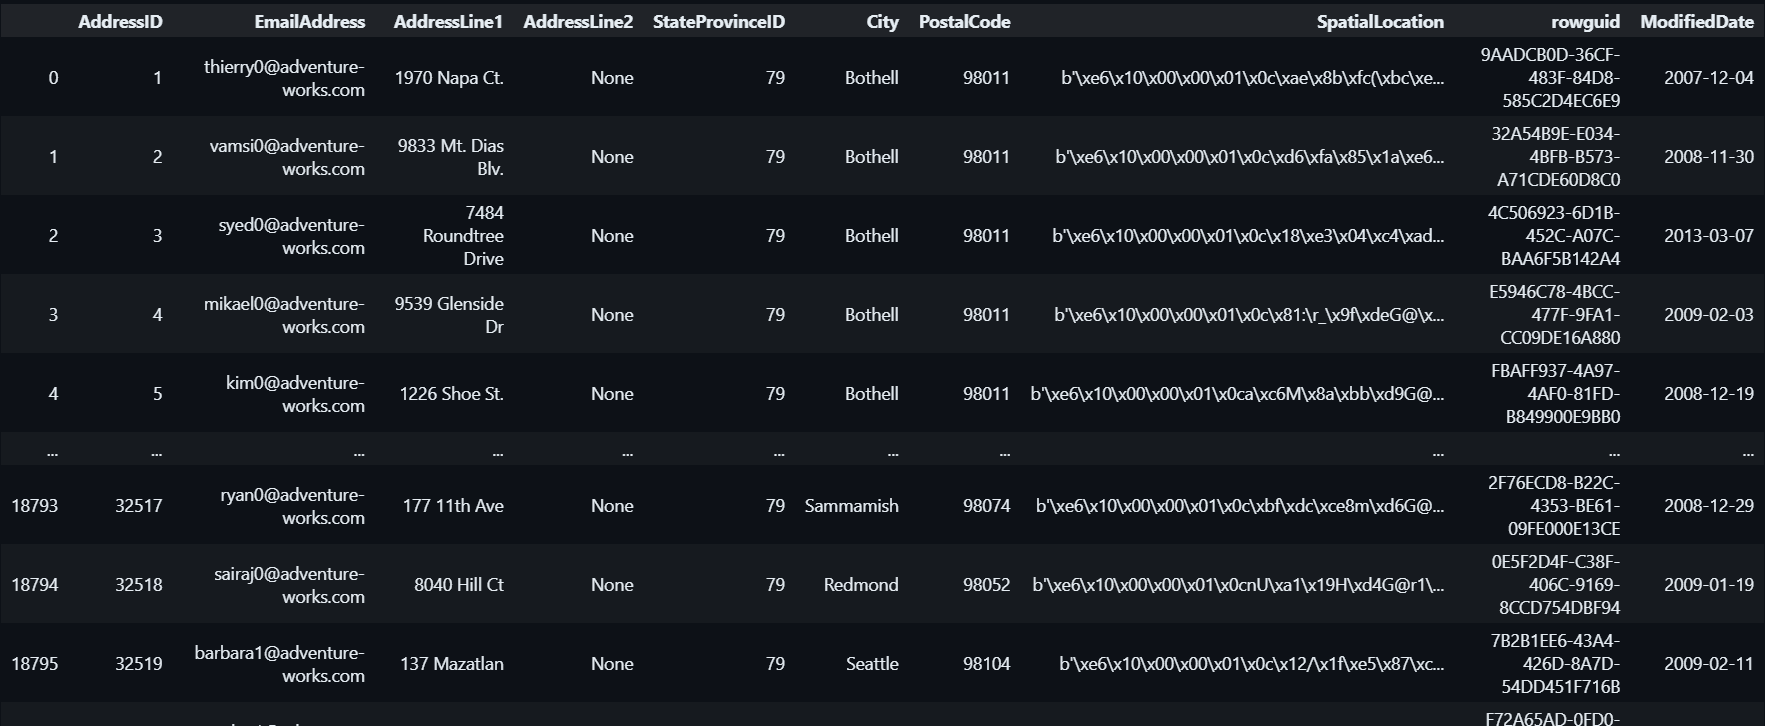




In [2]:
import pandas as pd
import pyodbc

In [5]:
server = 'MINHLAP\SQLEXPRESS'
conn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE=AdventureWorks2019;Trusted_Connection=yes;')
cursor = conn.cursor()

# query data từ  preson.EmailAddress, preson.BusinessEntityAddress, và preson.Address
cursor.execute('''
        SELECT a.AddressID,   
            e.EmailAddress,
            a.AddressLine1,
            a.AddressLine2,
            a.StateProvinceID,
            a.City,
            a.PostalCode,
            a.SpatialLocation,
            a.rowguid,
            a.ModifiedDate
        FROM Person.EmailAddress as e
        JOIN Person.BusinessEntityAddress as bea
            ON e.BusinessEntityID = bea.BusinessEntityID
        JOIN Person.Address as a
            ON bea.AddressID = a.AddressID       
    ''')
# lưu tất cả data vào  dataframe
rows = cursor.fetchall()

columns = [column[0] for column in cursor.description]

df = pd.DataFrame.from_records(rows, columns=columns)

df

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\quang\AppData\Local\Temp\ipykernel_9332\3704467224.py:1: SyntaxWarning: invalid escape sequence '\S'
  server = 'MINHLAP\SQLEXPRESS'


,AddressID,EmailAddress,AddressLine1,AddressLine2,StateProvinceID,City,PostalCode,SpatialLocation,rowguid,ModifiedDate
0,1,thierry0@adventure-works.com,1970 Napa Ct.,None,79,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\xae\x8b\xfc(\xbc\xe...,9AADCB0D-36CF-483F-84D8-585C2D4EC6E9,2007-12-04
1,2,vamsi0@adventure-works.com,9833 Mt. Dias Blv.,None,79,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\xd6\xfa\x85\x1a\xe6...,32A54B9E-E034-4BFB-B573-A71CDE60D8C0,2008-11-30
2,3,syed0@adventure-works.com,7484 Roundtree Drive,None,79,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\x18\xe3\x04\xc4\xad...,4C506923-6D1B-452C-A07C-BAA6F5B142A4,2013-03-07
3,4,mikael0@adventure-works.com,9539 Glenside Dr,None,79,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0c\x81:\r_\x9f\xdeG@\x...,E5946C78-4BCC-477F-9FA1-CC09DE16A880,2009-02-03
4,5,kim0@adventure-works.com,1226 Shoe St.,None,79,Bothell,98011,b'\xe6\x10\x00\x00\x01\x0ca\xc6M\x8a\xbb\xd9G@...,FBAFF937-4A97-4AF0-81FD-B849900E9BB0,2008-12-19
...,...,...,...,...,...,...,...,...,...,...
18793,32517,ryan0@adventure-works.com,177 11th Ave,None,79,Sammamish,98074,b'\xe6\x10\x00\x00\x01\x0c\xbf\xdc\xce8m\xd6G@...,2F76ECD8-B22C-4353-BE61-09FE000E13CE,2008-12-29
18794,32518,sairaj0@adventure-works.com,8040 Hill Ct,None,79,Redmond,98052,b'\xe6\x10\x00\x00\x01\x0cnU\xa1\x19H\xd4G@r1\...,0E5F2D4F-C38F-406C-9169-8CCD754DBF94,2009-01-19
18795,32519,barbara1@adventure-works.com,137 Mazatlan,None,79,Seattle,98104,b'\xe6\x10\x00\x00\x01\x0c\x12/\x1f\xe5\x87\xc...,7B2B1EE6-43A4-426D-8A7D-54DD451F716B,2009-02-11
18796,32520,dan1@adventure-works.com,5863 Sierra,None,79,Bellevue,98004,b'\xe6\x10\x00\x00\x01\x0c\xf7W\x1d{\xf0\xccG@...,F72A65AD-0FD0-42FD-8760-4B83DE543926,2009-01-15


In [6]:
# lưu thành file csv
df.to_csv('persondata.csv', index=True)